# Research Paper Clustering

## Setup and Imports

In this section, we import all the necessary libraries and modules required for the project. We also ensure that the `src` directory is included in the Python path to access custom modules.

In [91]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import seaborn as sns
import importlib

importlib.reload(src.data_processing)
from src.data_processing import DataProcessing
import src.clustering
importlib.reload(src.clustering)
from src.clustering import Clustering
from src.evaluation import Evaluation
from src.visualization import Visualization

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/peterwu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/peterwu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Extraction and Saving

Here, we initialize the `DataProcessing` class to handle text extraction from PDF files. We extract the abstracts from all PDF files in the specified directory and save the results to a CSV file.

In [86]:
# Initialize data processing
dp = DataProcessing()

# Directory containing raw PDF files
raw_data_dir = 'data/raw'
extracted_text_dir = 'data/processed/texts'

dp.process_pdfs(raw_data_dir, extracted_text_dir)

In [92]:
dp = DataProcessing()

# Save the results to a CSV file
output_csv = 'data/processed/abstracts.csv'
output_dir = 'data/processed/abstracts'

# Extract abstracts from all PDF files
dp.process_text_files(extracted_text_dir, output_dir)
dp.save_abstracts_to_csv(output_dir, output_csv)
print(f"Abstracts saved to {output_csv}")

# Display the first few rows of the dataframe
abstracts_df = pd.read_csv(output_csv)
abstracts_df.head()

Abstracts saved to data/processed/abstracts.csv


,File Name,Abstract
0,paper_30_abstract.txt,current trend indicates energy demand supply e...
1,paper_65_abstract.txt,b urn fourth common destructive trauma worldwi...
2,paper_37_abstract.txt,renewable energy key element sustainable envir...
3,paper_62_abstract.txt,electrochemical c n coupling reaction based ab...
4,paper_22_abstract.txt,combustion green fuel hydrogen energy carrier ...


## Load Abstracts

In this section, we load the extracted abstracts from the CSV file into a list and display a sample abstract to ensure the data has been loaded correctly.

In [93]:
# Load abstracts from CSV
abstracts = abstracts_df['Abstract'].tolist()
file_names = abstracts_df['File Name'].tolist()

# Display a sample abstract
print(abstracts[0])

current trend indicates energy demand supply eventually controlled autonomous soft ware optimizes decision making energy distribution operation new state art machine learning ml technology integral optimizing decision making energy distribution network system study conducted data driven probabilistic ml technique real time application smart energy system network highlight urgency area research study focused two key area use ml core energy technology ii use case ml energy distribution utility core energy technology include use ml advanced energy material energy system storage device energy efficiency smart energy material manufacturing smart grid paradigm strategic energy planning inte gration renewable energy big data analytics smart grid environment investigated ml area energy distribution system includes energy consumption price forecasting merit order energy price forecasting consumer lifetime value cybersecurity topic power delivery utilization grid edge system distributed energy r

## Vectorization

Next, we initialize the `Clustering` class and vectorize the abstracts using the TF-IDF vectorizer. We then display the shape of the vectorized text and some examples of vectorized text features and their values.

In [96]:
# Test K means Clustering
# clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='kmeans')
# Test Agglomerative Hierarchical Clustering
clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='hierarchical')
# Test DBSCAN
# clustering = Clustering(vectorizer_type='spacy_word2vec', algorithm='dbscan')
# # Test Spectral Clustering
# clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='spectral')
# # Test Gaussian Mixture Models
# clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='gmm')


# Vectorize abstracts
X = clustering.vectorize_texts(abstracts)

# Display the shape of the vectorized text
print("Number of documents, Number of features: ", X.shape)  # (Number of documents, Number of features)

# Display some examples of vectorized text features and their values greater than 0
if clustering.vectorizer_type == 'tfidf':
    feature_names = clustering.vectorizer.get_feature_names_out()
    vector_values = X[0].toarray()[0]  # TF-IDF returns a sparse matrix
else:
    feature_names = clustering.vectorizer.get_feature_names_out()
    vector_values = X[0]  # Other vectorizers return a dense matrix

# Get indices where the vector values are greater than 0
non_zero_indices = vector_values > 0

# Print the feature names and their corresponding values for non-zero entries
print("Non-zero feature names (words) and their values for the first abstract:")
for feature, value in zip(feature_names[non_zero_indices], vector_values[non_zero_indices]):
    print(f"{feature}: {value}")


Number of documents, Number of features:  (79, 300)
Non-zero feature names (words) and their values for the first abstract:
feature_1: 0.8466970920562744
feature_3: 1.0240416526794434
feature_4: 2.5194921493530273
feature_6: 1.5684962272644043
feature_7: 3.902742624282837
feature_10: 6.171562194824219
feature_11: 2.21122407913208
feature_13: 1.9751349687576294
feature_15: 1.953223466873169
feature_16: 3.555204153060913
feature_17: 0.5325402021408081
feature_20: 0.2776879072189331
feature_21: 2.0119290351867676
feature_29: 0.9921025633811951
feature_30: 1.3500298261642456
feature_31: 0.16138626635074615
feature_34: 0.3459561765193939
feature_36: 1.4478209018707275
feature_37: 0.4947853088378906
feature_38: 1.9475655555725098
feature_39: 1.464369535446167
feature_42: 0.749563455581665
feature_43: 0.8973093628883362
feature_45: 2.279902696609497
feature_46: 3.116739273071289
feature_48: 1.0579184293746948
feature_50: 0.7105225324630737
feature_51: 2.108332633972168
feature_55: 1.037459373

## Determine Optimal Number of Clusters

In this part, we determine the optimal number of clusters by calculating the Within-Cluster Sum of Squares (WCSS) and silhouette scores for a range of cluster numbers. We then plot the elbow method and silhouette analysis to visualize the results.

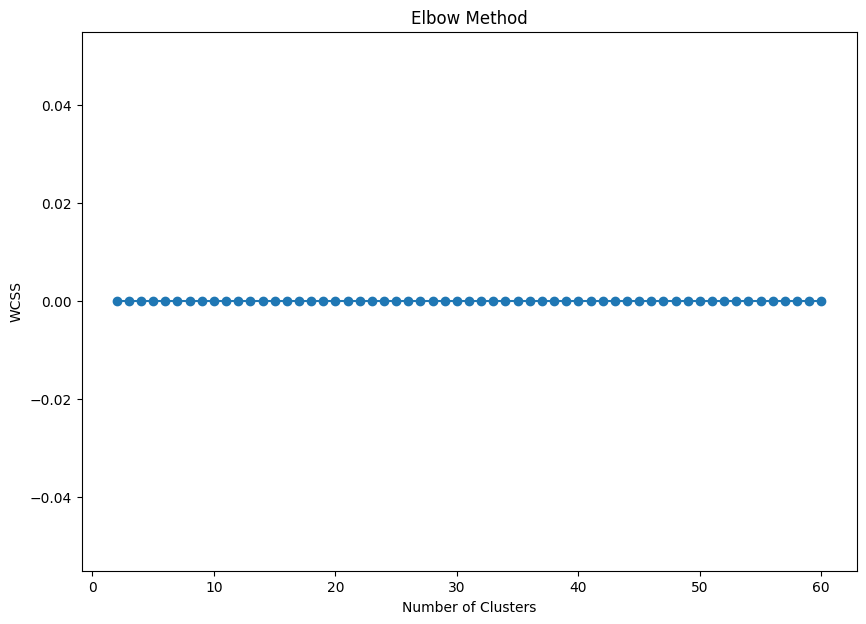

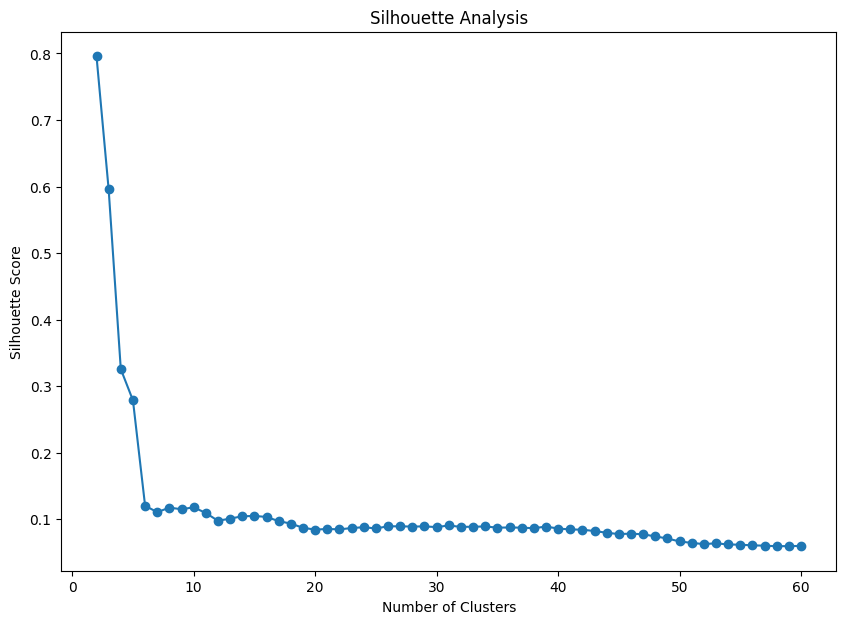

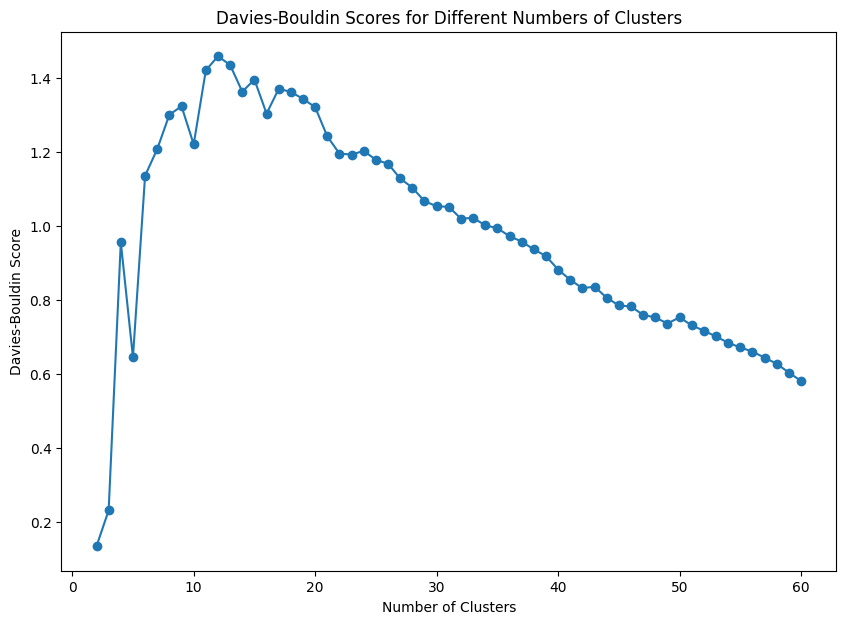

Setting the number of clusters to 9


In [113]:
# Initialize clustering
# clustering = Clustering(vectorizer_type='tfidf')
# clustering = Clustering(vectorizer_type='spacy_word2vec')
# clustering = Clustering(vectorizer_type='bert')

# Test K means Clustering
# clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='kmeans')
# Test Agglomerative Hierarchical Clustering
clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='hierarchical')
# Test DBSCAN
# clustering = Clustering(vectorizer_type='spacy_word2vec', algorithm='dbscan')
# # Test Spectral Clustering
# clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='spectral')
# # Test Gaussian Mixture Models
# clustering = Clustering(n_clusters=9, vectorizer_type='spacy_word2vec', algorithm='gmm')

# Determine the optimal number of clusters
max_clusters = 60  # Test up to 20 clusters
wcss, silhouette_scores, davies_bouldin_scores = clustering.determine_optimal_clusters(abstracts, max_clusters=max_clusters)

# Plot elbow method using Evaluation class
Evaluation.plot_elbow_method(wcss)

# Plot silhouette analysis using Evaluation class
Evaluation.plot_silhouette_analysis(silhouette_scores)

# Plot Davies-Bouldin scores
plt.figure(figsize=(10, 7))
plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Choose the optimal number of clusters based on silhouette score
# optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
optimal_clusters = 9
print(f"Setting the number of clusters to {optimal_clusters}")

## Clustering and Visualization

Finally, we choose the optimal number of clusters based on the silhouette score and reinitialize the `Clustering` class with this number. We fit and predict the clusters, save the clustering results, and visualize the clusters using t-SNE.

In [114]:
# Initialize clustering
# clustering = Clustering(vectorizer_type='tfidf')
# clustering = Clustering(vectorizer_type='spacy_word2vec', n_clusters=optimal_clusters)
# clustering = Clustering(vectorizer_type='bert', n_clusters=optimal_clusters)

# Test Agglomerative Hierarchical Clustering
clustering = Clustering(n_clusters=optimal_clusters, vectorizer_type='spacy_word2vec', algorithm='hierarchical')
# Test DBSCAN
# clustering = Clustering(vectorizer_type='spacy_word2vec', algorithm='dbscan')
# # Test Spectral Clustering
# clustering = Clustering(n_clusters=optimal_clusters, vectorizer_type='spacy_word2vec', algorithm='spectral')
# # Test Gaussian Mixture Models
# clustering = Clustering(n_clusters=optimal_clusters, vectorizer_type='spacy_word2vec', algorithm='gmm')

# Vectorize abstracts again with optimal clusters
X = clustering.vectorize_texts(abstracts)

# Fit and predict clusters
labels, score = clustering.fit_predict(X)
print(f"Silhouette Score: {score}")

# Save clustering results
output_path = 'data/processed/clustering_results.csv'
clustering.save_results(file_names, abstracts, labels, output_path)
print(f"Clustering results saved to {output_path}")

# Generate and save summary report
summary_output_path = 'data/processed/summary_report.csv'
clustering.generate_summary_report(file_names, abstracts, labels, summary_output_path)
print(f"Summary report saved to {summary_output_path}")

# Display the first few rows of the clustering results
results_df = pd.read_csv(output_path)
results_df.head()

Silhouette Score: 0.11521279066801071
Clustering results saved to data/processed/clustering_results.csv
Summary report saved to data/processed/summary_report.csv


,File Name,Cluster,First 10 Words of Abstract
0,paper_30_abstract.txt,2,current trend indicates energy demand supply e...
1,paper_65_abstract.txt,0,b urn fourth common destructive trauma worldwi...
2,paper_37_abstract.txt,2,renewable energy key element sustainable envir...
3,paper_62_abstract.txt,6,electrochemical c n coupling reaction based ab...
4,paper_22_abstract.txt,2,combustion green fuel hydrogen energy carrier ...


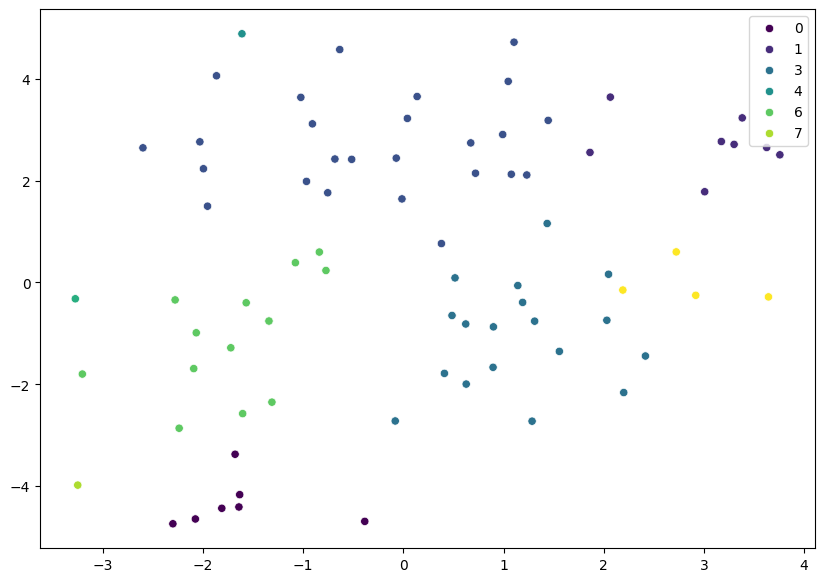

In [115]:
# Visualize clusters
visualization = Visualization()
visualization.visualize_clusters(X, labels)